In [59]:
from dataset import Dataset
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import cv2
from collections import Counter
import random
import numpy as np
from sklearn.decomposition import PCA

%matplotlib inline

In [60]:
def flatInput(train_data,train_labels,test_data,test_labels):
    trainX = train_data
    trainY = train_labels

    tx = test_data
    ty = test_labels

    # Flatten data for test images as a vector and labels as numbers
    flattenDataset = np.nan_to_num(np.array([image.flatten() for image in trainX]))
    flatTest = np.nan_to_num(np.array([image.flatten() for image in tx]))
    fTrainLabels = np.where(trainY == 1)[1]
    fTestLabels = np.where(ty == 1)[1]
    return flattenDataset, flatTest, fTrainLabels, fTestLabels

def inverseNorm(image,dataset):
    im = image.reshape((96,96))
    return (im * dataset.std) + dataset.mean

In [61]:
def pca2Visua(pca,data,labels,nClases):
    # Show a few statistics of the data
    print  "Pca with 2 components explained variance " + str(pca.explained_variance_ratio_)
    print "PCA 2 comp of the data (using train)"

    transformed = pca.transform(data)

    plt.figure()
    allscatter = []
    for c in range(nClases):
        elements = np.where(labels == c)
        temp = plt.scatter(transformed[elements, 0], transformed[elements, 1],
                           facecolors='none', label='Class ' + str(c), c=np.random.rand(3, 1))
        allscatter.append(temp)
    plt.legend(tuple(allscatter),
               tuple(["class " + str(c) for c in range(nClases)]),
               scatterpoints=1,
               loc='lower left',
               ncol=3,
               fontsize=8)
    plt.show()

In [62]:
# seed = 100 * random.random()
seed = 1
#Changing the seed will give a new train-val-test split
dataset = Dataset("data/BaselineOuterInner", batch_size=20,seed=seed)
nClases = dataset.getNclasses()

flattenDataset, flatTest, fTrainLabels, fTestLabels = flatInput(dataset.train_data, dataset.train_labels, dataset.test_data, dataset.test_labels)

In [63]:
cn = {0: "Inner fault", 1: "Baseline", 2 : "Outer fault "}

Distribution class for train  Counter({2: 2625, 1: 1699, 0: 972})
Distribution class for test    Counter({2: 1602, 1: 1024, 0: 617})


Pca with 2 components explained variance [ 0.25346737  0.01814894]
PCA 2 comp of the data (using train)


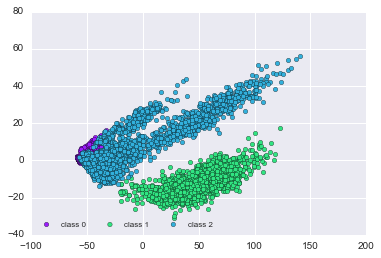

In [64]:
print "Distribution class for train ", Counter(fTrainLabels)
print "Distribution class for test   ",Counter(fTestLabels)
pca = PCA(n_components=2)
pca.fit(flattenDataset)


pca2Visua(pca,flattenDataset,fTrainLabels,nClases)

Train image  210d1_1.jpg
Test image  90d6_0.jpg


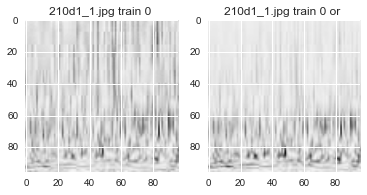

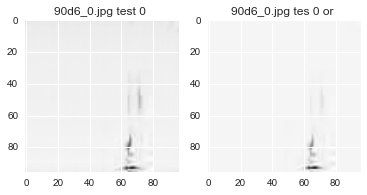

In [65]:
#Show first 1 images train and 1 image test (to show that seed changed)

#------------------TRAIN IAMGE
fname = dataset.getTrainFilename(0)
print "Train image ",fname

imTrain =   flattenDataset[0].reshape((96,96))

fig, grid = plt.subplots(1, 2)
grid[0].set_title(fname+' train 0 ')
grid[0].imshow(imTrain)

#REMEMBER THE IMAGES IN THE DATASET ARE NORMALIZED 
#THIS WILL INVERT THE TRANSFORMATION (will be the same as original)
org = inverseNorm(imTrain,dataset)

grid[1].set_title(fname+' train 0 or ')
grid[1].imshow(org)

#------------------TEST IAMGE


fname = dataset.getTestFilename(0)
print "Test image ",fname
imgTest =   flatTest[0].reshape((96,96))

fig, grid = plt.subplots(1, 2)
grid[0].set_title(fname+' test 0 ')
grid[0].imshow(imgTest)

#REMEMBER THE IMAGES IN THE DATASET ARE NORMALIZED 
#THIS WILL INVERT THE TRANSFORMATION (will be the same as original)
org = inverseNorm(imgTest,dataset)

grid[1].set_title(fname+' tes 0 or ')
grid[1].imshow(org)

Class  0  name  Inner fault


Class  1  name  Baseline


Class  2  name  Outer fault 


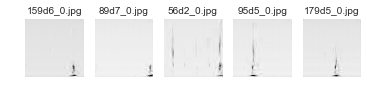

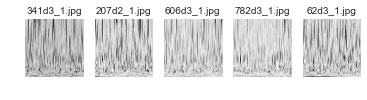

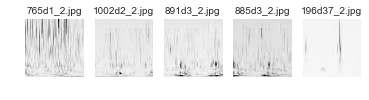

In [66]:
#REMEMBER THE IMAGES IN THE DATASET ARE NORMALIZED 
#THIS WILL INVERT THE TRANSFORMATION (will be the same as original)

#if you want to see iamges as the files use 
# inverseNorm(img,dataset)

for c in range(nClases):
    elements = np.where(fTrainLabels == c)
    
    name = cn[c]

    random.seed(5)
    
    #Show 5 random element of that class
    fig, grid = plt.subplots(1, 5)
    print "Class ",c," name ",name
    for j in range(5):
        
        r=random.randint(0,elements[0].shape[0])
        ind = elements[0][r]
        fileName = dataset.getTrainFilename(ind)
        image = flattenDataset[ind,:].reshape((96,96))
        
        #If you want to see images as shown in files
        # image = inverseNorm(flattenDataset[ind,:],dataset)
        
        grid[j].imshow(image)
        grid[j].set_adjustable('box-forced')
        grid[j].autoscale(False)
        grid[j].set_title(str(fileName), fontsize=10)
        grid[j].axis('off')

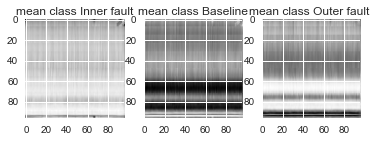

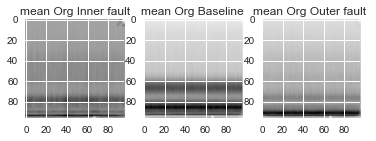

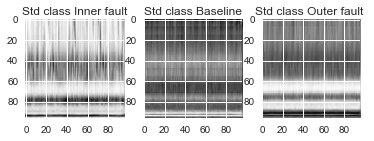

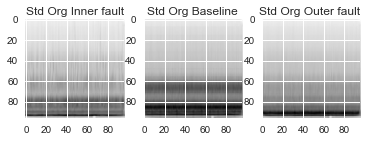

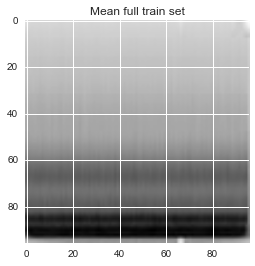

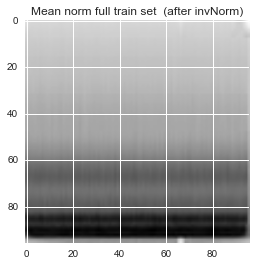

In [67]:
#Show mean image of train per class
#NOTE THIS IMAGE IS NOT THE MEAN IMAGE IN DATASET. This mean image is calculated with normalized images
#THe original mean image was calculated with the original images in train set.

fig, grid = plt.subplots(1, nClases)
for c in range(nClases):
    elements = np.where(fTrainLabels == c)
    classMean = np.mean(flattenDataset[elements,:],axis=1).reshape((96,96))
    grid[c].set_title('mean class '+str(cn[c]))
    grid[c].imshow(classMean)

#SHOW IMAGES MEAN AS ORIGINAL IMAGE (INVERT NORM)
fig, grid = plt.subplots(1, nClases)
for c in range(nClases):
    elements = np.where(fTrainLabels == c)
    classMean = inverseNorm(np.mean(flattenDataset[elements,:],axis=1),dataset)
    grid[c].set_title('mean Org '+str(cn[c]))
    grid[c].imshow(classMean)

fig, grid = plt.subplots(1, nClases)
for c in range(nClases):
    elements = np.where(fTrainLabels == c)
    classMean = np.std(flattenDataset[elements,:],axis=1).reshape((96,96))
    grid[c].set_title('Std class '+str(cn[c]))
    grid[c].imshow(classMean)

#SHOW IMAGES MEAN AS ORIGINAL IMAGE (INVERT NORM)
fig, grid = plt.subplots(1, nClases)
for c in range(nClases):
    elements = np.where(fTrainLabels == c)
    classMean = inverseNorm(np.std(flattenDataset[elements,:],axis=1),dataset)
    grid[c].set_title('Std Org '+str(cn[c]))
    grid[c].imshow(classMean)

normMean = np.mean(flattenDataset,axis=0)
plt.figure()
plt.title('Mean full train set')
plt.imshow(dataset.mean)

plt.figure()
plt.title('Mean norm full train set  (after invNorm)')
plt.imshow(inverseNorm(normMean,dataset))

In [68]:
import pandas
import seaborn as sns
#Choose RAW or PCA30
datasetFlatX = flattenDataset
datasetFlaty = fTrainLabels

datasetFlatTestX = flatTest
datasetFlatTesty = fTestLabels

nComp = 6
pca = PCA(n_components=nComp)
pca.fit(datasetFlatX)
print  "Pca with "+str(nComp)+" components explained variance " + str(np.sum(pca.explained_variance_ratio_))

dataPcaTrainX = pca.transform(flattenDataset)
dataPcaTrainy = fTrainLabels

dataPcaTestX = pca.transform(flatTest)
dataPcaTesty = fTestLabels

Pca with 6 components explained variance 0.30367463969


In [69]:
data = pandas.DataFrame(data=dataPcaTrainX, columns=['pca'+str(i) for i in range(dataPcaTrainX.shape[1])])
data['class'] = pandas.Series(dataPcaTrainy, index=data.index)

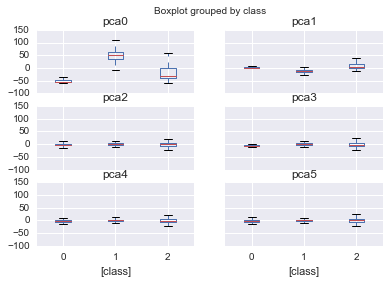

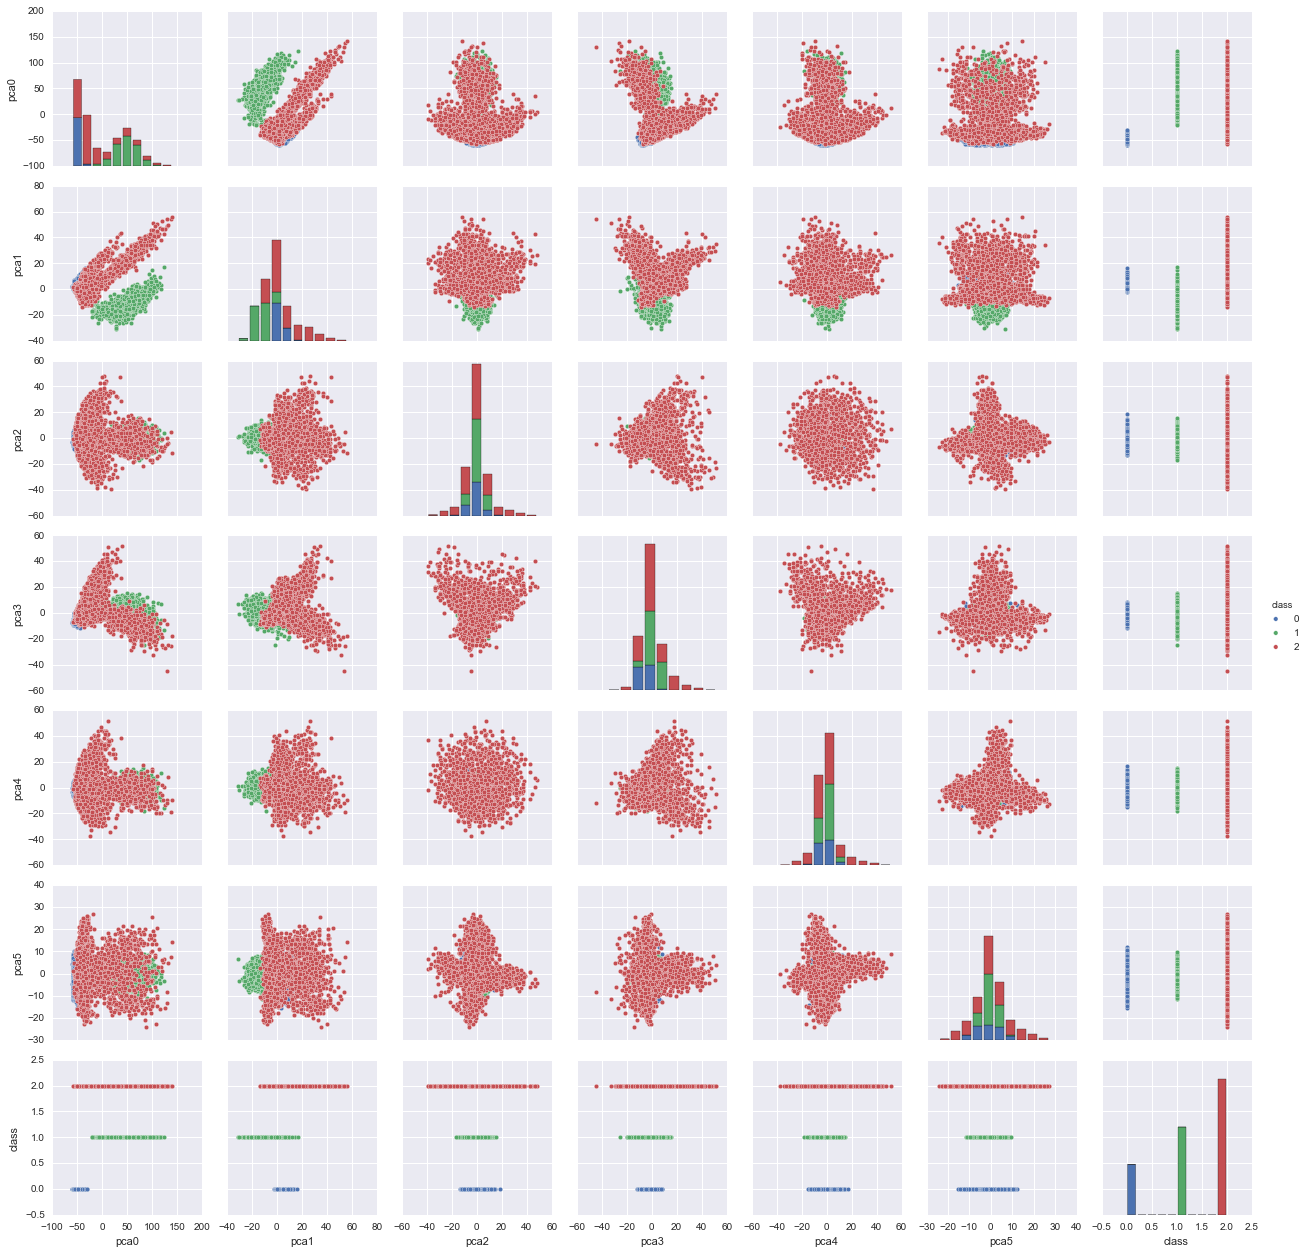

In [70]:
data.boxplot(by='class')
sns.pairplot(data, hue="class")

In [71]:
from sklearn.cluster import MiniBatchKMeans
plt.figure()
# Compute clustering with MiniBatchKMeans.
mbk = MiniBatchKMeans(init='k-means++', n_clusters=5, batch_size=100,
                      n_init=10, max_no_improvement=10, verbose=0,
                      random_state=0)
mbk.fit(datasetFlatX)

dataKmTrainX = mbk.transform(datasetFlatX)
dataKmTrainy = fTrainLabels

dataKmTestX = mbk.transform(datasetFlatTestX)
dataKmTesty = datasetFlatTesty

In [72]:
data = pandas.DataFrame(data= dataKmTrainX, columns=['km'+str(i) for i in range(dataKmTrainX.shape[1])])
# print data.shape
data['class'] = pandas.Series(dataKmTrainy, index=data.index)

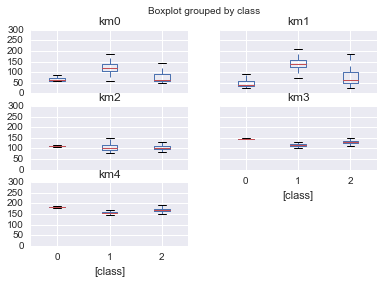

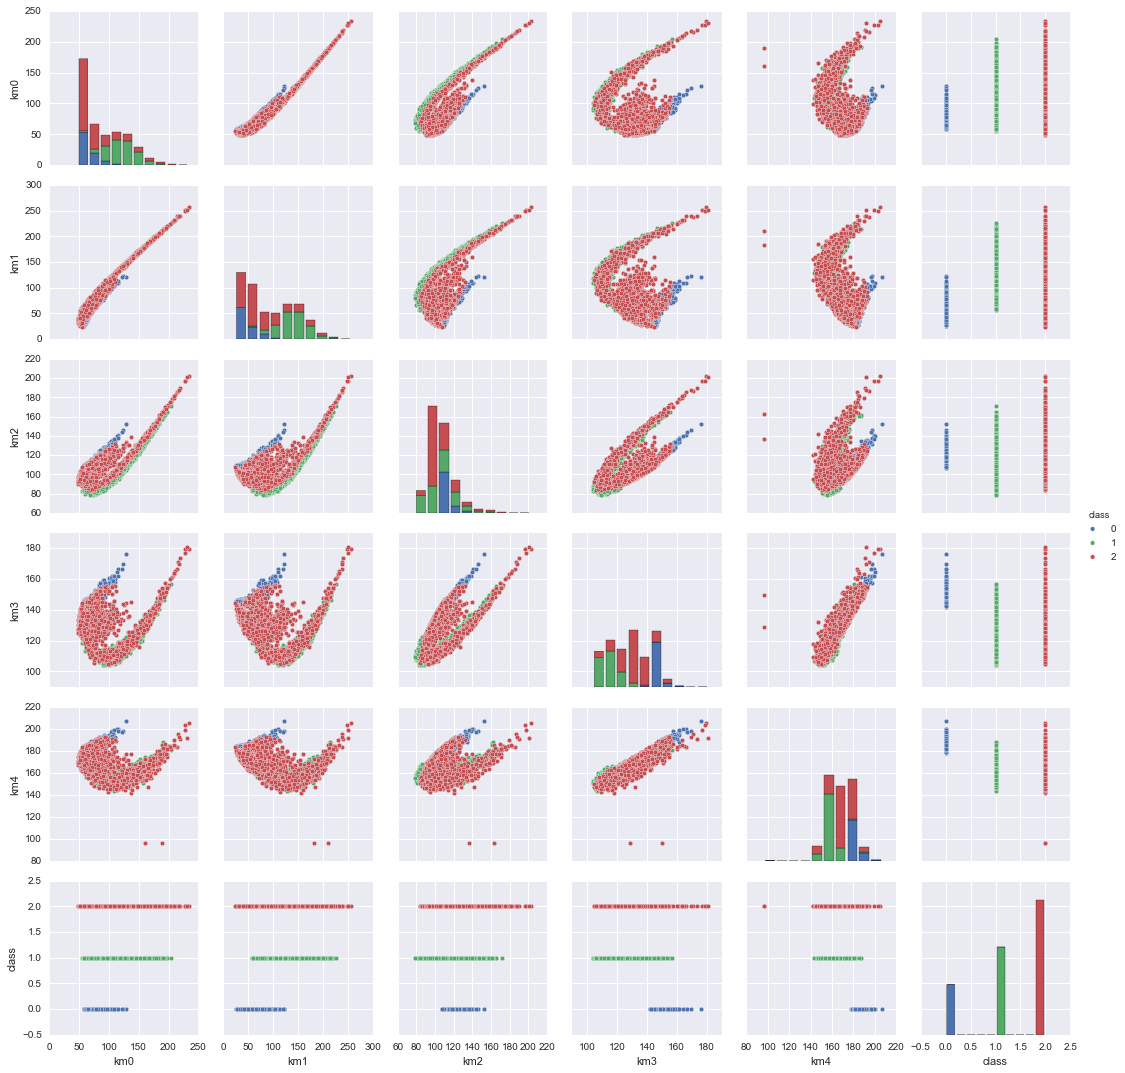

In [73]:
data.boxplot(by='class')
sns.pairplot(data, hue="class")

In [74]:
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report

In [75]:
#Use MLP
def runMLP(X,y, tX,ty):
    clf = MLPClassifier(algorithm='adam', alpha=1e-5,hidden_layer_sizes=(50, 3), random_state=1)
    
    clf.fit(X, y) 
    pred = clf.predict(tX)
    print classification_report(ty, pred)
    
#Use Linear support machine
def useLinear(X,y, tX,ty):
    clf = SGDClassifier()
    clf.fit(X, y) 
    pred = clf.predict(tX)
    print classification_report(ty, pred)
    
#USE SVM (uses rbf o gaussian kernel)
def useSVM(X,y, tX,ty):
    clf = SVC()
    clf.fit(X, y) 
    pred = clf.predict(tX)
    print classification_report(ty, pred)

In [55]:
#Use flat dataset
X,y, tX,ty = datasetFlatX[:2000,:], datasetFlaty[:2000], datasetFlatTestX, datasetFlatTesty

runMLP(X,y, tX,ty)
useLinear(X,y, tX,ty)
useSVM(X,y, tX,ty)


In [56]:
# #use pca dataset
X,y, tX,ty =  dataPcaTrainX, dataPcaTrainy, dataPcaTestX, dataPcaTesty

runMLP(X,y, tX,ty)
useLinear(X,y, tX,ty)
useSVM(X,y, tX,ty)

             precision    recall  f1-score   support

          0       0.91      0.96      0.93       590
          1       1.00      1.00      1.00      1014
          2       0.98      0.97      0.97      1639

avg / total       0.98      0.97      0.97      3243

             precision    recall  f1-score   support

          0       0.66      0.97      0.78       590
          1       0.90      1.00      0.95      1014
          2       0.99      0.75      0.85      1639

avg / total       0.90      0.87      0.87      3243



             precision    recall  f1-score   support

          0       0.98      0.56      0.71       590
          1       1.00      0.31      0.47      1014
          2       0.63      1.00      0.77      1639

avg / total       0.81      0.70      0.67      3243



In [57]:
# #use k means dataset
X,y, tX,ty =  dataKmTrainX, dataKmTrainy, dataKmTestX, dataKmTesty

runMLP(X,y, tX,ty)
useLinear(X,y, tX,ty)
useSVM(X,y, tX,ty)

C:\Users\andres\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1125: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00       590
          1       0.00      0.00      0.00      1014
          2       0.51      1.00      0.67      1639

avg / total       0.26      0.51      0.34      3243

             precision    recall  f1-score   support

          0       0.60      0.83      0.70       590
          1       1.00      0.98      0.99      1014
          2       0.91      0.80      0.85      1639

avg / total       0.88      0.86      0.87      3243



             precision    recall  f1-score   support

          0       0.92      0.89      0.91       590
          1       1.00      0.96      0.98      1014
          2       0.94      0.97      0.96      1639

avg / total       0.96      0.95      0.95      3243

